# Problems
---
### Warmup
Finish the following code:
```python
def generate_permutations(elements):
    '''Generate all permutations of the given elements in a list.
    
    Example:
        >>> generate_permutations([1, 2])
        [[1, 2], [2, 1]]
        >>> generate_permutations([1, 2, 3])
        [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
    '''
    def backtrack(current, remaining):
        # Base case: if no elements remain, we have a complete permutation
        if not remaining:
            ...
            
        # Try each remaining element as the next item in the permutation
        for i in range(len(remaining)):
            # Choose i-th element to add to the current permutation
            ...
            # Continue deeper with this choice
            backtrack(...)
            # Unchoose (backtrack) to try the next element
            current.pop()
    
    result = []
    backtrack([], elements)
    return result

import doctest
doctest.testmod()
```

In [6]:
def generate_permutations(elements):
    '''Generate all permutations of the given elements in a list.
    
    Example:
        >>> generate_permutations([1, 2])
        [[1, 2], [2, 1]]
        >>> generate_permutations([1, 2, 3])
        [[1, 2, 3], [1, 3, 2], [2, 1, 3], [2, 3, 1], [3, 1, 2], [3, 2, 1]]
    '''
    def backtrack(current, remaining):
        # Base case: if no elements remain, we have a complete permutation
        if not remaining:
            result.append(current.copy())
            return None
            
        # Try each remaining element as the next item in the permutation
        for i in range(len(remaining)):
            # Choose i-th element to add to the current permutation
            current.append(remaining[i])
            # Continue deeper with this choice
            backtrack(current, remaining[:i] + remaining[i+1:])
            # Unchoose (backtrack) to try the next element
            current.pop()
    
    result = []
    backtrack([], elements)
    return result
    
import doctest
doctest.testmod()

TestResults(failed=0, attempted=2)

---
### Queen configurations
Find all possible configurations of `n` queens on a chessboard of size `n x n`. Return a list (solution) of lists, where each solution is encoded using index of the list and number stored in it. 

For example: `[1,3,0,2]` means the queens are stored at coordinates `(0,1), (1,3), (2,0), (3,2)`

Recursion will occur in the following way:

- place the first queen in the top row on all possible positions,
- find all possible configurations of the remaining queens in the remaining rows

In [2]:
def queens_configurations(n):
    '''Find all possible configurations for n queens on an n x n chessboard. Return a list (solution) of lists, whereeach solution is encoded using index of the list and number stored in it. For example:
    [1,3,0,2] means the queens are stored at coordinates (0,1), (1,3), (2,0), (3,2)

    Example:
        >>> queens_configurations(4)
        [[1, 3, 0, 2], [2, 0, 3, 1]]
    '''
    def check_configuration(board, row, col):
        """Check if the given position is not attacked by any other queen on the board, therefore is safe for placing new queen. 
        Return True or False.
        """
        for i in range(row):
            if board[i] == col or abs(i - row) == abs(board[i] - col):
                return False
        return True

    def locate_for_n(board, row, n, solutions):
        """Recursive function to place queens on the board."""
        # Base case: if all n queens are placed, add the board to solutions
        if row == n:
            solutions.append(board[:])
            return None

        # Recursive case: try all possible positions for the queen in the current row
        for col in range(n):
            if check_configuration(board, row, col):
                board[row] = col
                locate_for_n(board, row + 1, n, solutions)
                board[row] = -1

    # create an empty board
    board = [-1] * n
    solutions = []
    locate_for_n(board, 0, n, solutions)
    return solutions

n = 4
solutions = queens_configurations(n)
print(solutions)
import doctest
doctest.testmod()

[[1, 3, 0, 2], [2, 0, 3, 1]]


TestResults(failed=0, attempted=3)

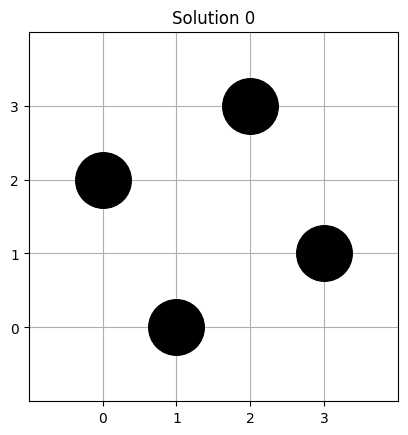

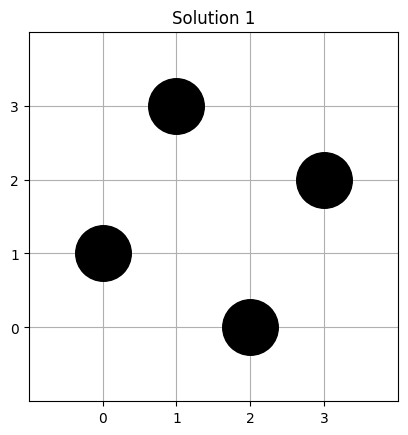

In [3]:
import matplotlib.pyplot as plt
import numpy as np
for i, solution in enumerate(solutions):
    plt.figure()
    plt.title('Solution {}'.format(i))
    plt.xlim(-1, n)
    plt.ylim(-1, n)
    plt.xticks(np.arange(n))
    plt.yticks(np.arange(n))
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid(True)
    for row, col in enumerate(solution):
        plt.plot(col, row, 'o', c='black', markersize=40)

plt.show()

# Problematic problems
---
## Folder tree
Write out all folders and files in them into the list starting from some subfolder. Or you might try to format it nicely.
This mimics the `tree` command in Linux, which outputs something like
```
├── helper-define-polyfill-provider
│   ├── esm
│   ├── lib
│   │   ├── browser
│   │   ├── node
│   │   └── visitors
│   └── src
│       ├── browser
│       └── node
```
You might use the `os` module (`import os`) and its functions `os.listdir` and `os.path.isdir` to list files in folder and find all subfolders of the current folder. Also `os.path.join(path, file)` might be handy.

In [ ]:
import os

def get_files(path: str) -> list:
    '''
    Get all files in the folder and subfolders
    '''
    if os.path.isfile(path):
        return [path]
    else:
        files = []
        for file in os.listdir(path):
            files += get_files(os.path.join(path, file))
        return files
    
get_files('../')